## A study into Intel and AMD systems with an RTX 3080 using 3DMark benchmarking tools
*By Caesar Dominic Lindog*

## **Rationale**

>Consumer-grade computer GPUs (graphics processing unit) took quite a leap with Nvidia's RTX 3000 series by utilizing deep learning, artificial intelligence, and improved real-time ray-tracing performance for a number of video games.

Intel's comeuppance for neglecting its only competitor's growth since Ryzen first launched in 2017, there is this solidly-formed opinion that PC gamers have – that AMD has effectively closed the gap by always undercutting and offering more cores than Intel's offerings year by year.

This research is aimed towards people who are still in the decision-making process of selecting a CPU and chipset manufacturer to build a gaming PC or for those that are looped into always waiting for the 'next big thing' and not upgrading outright launching.

>AMD has slowly been on the uptick months after the first generation Ryzen CPUs and now, they have fully secured TSMC's capacity for 7nm fabrication.

Even though the control variable is currently short-stocked, I chose the new GeForce RTX 3080 GPU as a control variable to completely eliminate potential GPU bottlenecks the benchmarks' results would not show.

Below are the search parameters I used for pulling up results from [Time Spy (DX12), Port Royal (Ray-Tracing), and Fire Strike (DX11)](https://benchmarks.ul.com/3dmark) using [3DMark's Classic Search](https://https://www.3dmark.com/classic-search).

>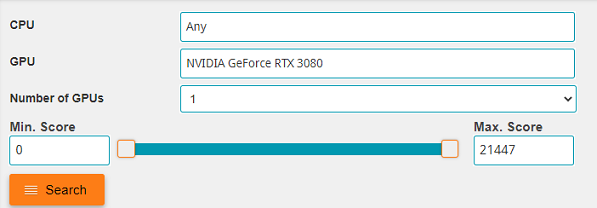\
*These gave me the first 950+ results on top of the benchmark leaderboards with a total of about 3000 records.*

## **Hypothesis**

>$Ho$ - *There is no difference in performance between AMD and Intel systems in 3DMark's benchmarking tools.*

>$Ha$ - *There is a difference in performance between AMD and Intel systems in 3DMark's benchmarking tools.*

### *Tests to be used*

Correlation tests will be ran to have a better overview of the data set scraped from 3DMark. While it is easy to generalize pre hoc that Intel still dominates the gaming market, it never is the finality hence the initiative for this research.

Albeit being continuous variables, benchmark scores and clock speeds rarely project normality, if not at all. Initially, I want to run numerous non-parametric t-tests and analyze variances by comparing scores between AMD and Intel systems with other variable to avoid Simpson's paradox.

*In summary,*  
* Non-parametric t-test (Mood's median test for the main research)
  * between Intel and AMD scores across the 3 benchmarks
  * between Intel and AMD scores entirely from the data set

## **Process**


The array of benchmarking tools and games that are publicly-accessible limited my tools of choice since I do have to scrape my own data. Knowing this, I went to 3DMark since they seemed to have the most accessible results' database across tiered benchmarks built to simulate specific use-cases.

>While I do understand the real-world disconnection (e.g. video games, video editing, decompression rates, deep learning, etc.) of synthetic benchmarks, the numbers they produce are still substantial in making an educated choice when it comes to upgrading and/or buying a new PC.

3DMark provides a good outlook on how well your system is against others', but checking results on the Hall of Fame along will never be enough for consumers looking to make the most out of their money.

Since there is currently no publicly-accessible data set for the benchmarks' results, I had to make a [scraper](https://https://colab.research.google.com/drive/1iWOszZQUSaMOdClU0wh5m2sVQOfwbkiW#scrollTo=MMmyXtUFDyu4&line=1&uniqifier=1).

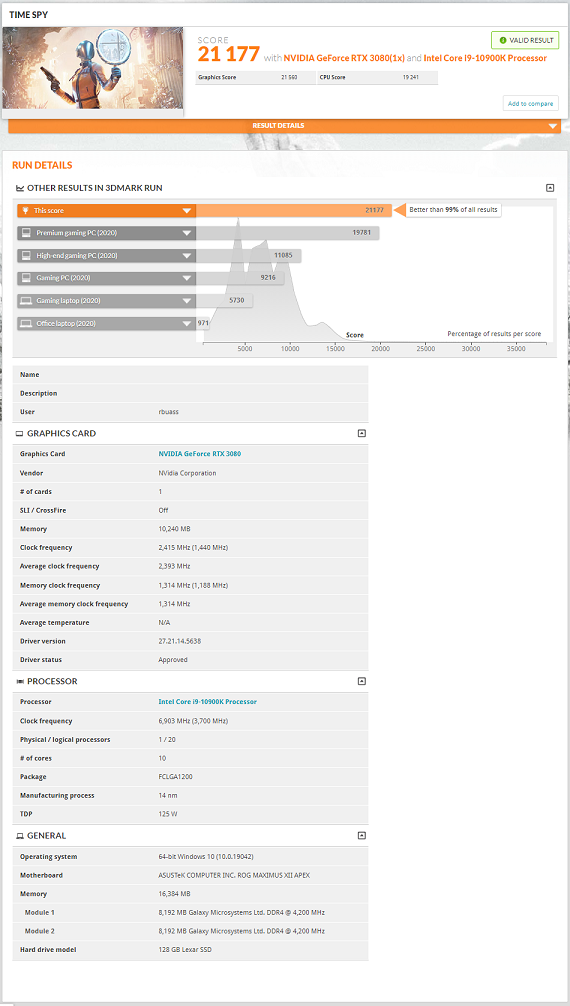



*No unique data was left, but not all is saved to an external file for analysis in this research.*

### *Niche-ception*

Gaming may not be a niche market naymore, but those who are into building computers with an extra touch of specificity and/or overclocking are definitely a one-of-a-kind demographic. The results you are about to see have outliers caused by extreme overclocking (pushing your components beyond their limits). The reason why I added this section is to further clarify the difference it may bring to the table when it comes to overall performance.

While it may have seemed fair to just collect the data of those who are still running within whitepaper or stock clocks, Intel's Turbo Boost and AMD's Precision Boost Overdrive do not exist for marketing purposes only (e.g. *up to 5.1GHz*) especially for SKUs that are meant to be overclocked.

Overclocking is an entire ecosystem in the already-small space of enthusiasts who are ready to burn up ours optimizing every component to the lowest voltages with most throughput and it will be highly negligible of me as a researcher if I do not include the ridiculously high scores that can only be achieved by liquid nitrogen and pure luck.

### *Research extension*

Personally, this is only the start of a huge project I want to work on until I learn everything I need to create the ultimate benchmark collector. 3DMark's results leave much to be desired, considering the thousands upon thousands of verified runs that can be pulled for analysis.

I appreciate you, the reader, scholar, enthusiast, passerby who are currently reading this, probably bewildered by the initial wall of text.

## **Analysis**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import random
import scipy

### *Dependencies*

Since we will be exploring *differences*, *correlations*, and *variances*, *numpy*, *scipy*, and *seaborn* will play important roles, one after another.

In [6]:
# fs for 'Fire Strike'
fs = pd.read_csv("/content/drive/My Drive/Capstone 1/3dmark_firestrike_3080.csv", parse_dates=['date'], encoding='utf-8')
fs_u = fs
# pr for 'Port Royal'
pr = pd.read_csv("/content/drive/My Drive/Capstone 1/3dmark_portroyal_3080.csv", parse_dates=['date'], encoding='utf-8')
pr_u = pr
# ts for 'Time Spy'
ts = pd.read_csv("/content/drive/My Drive/Capstone 1/3dmark_timespy_3080.csv", parse_dates=['date'], encoding='utf-8')
ts_u = ts

print('We have {} samples.'.format(len(fs) + len(pr) + len(ts)))

We have 2961 samples.


>Checking the columns, it showed the different results each benchmark puts out. Also, there were instances wherein the RAM's clock speed was not logged correctly, resulting in text data from the Storage/Hard drive model section be pulled instead.

In [ ]:
fs.info()
pr.info()
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   benchmark              983 non-null    object        
 1   benchmark_version      983 non-null    float64       
 2   cmbnd                  983 non-null    int64         
 3   cmbnd_t                983 non-null    float64       
 4   cpu_clock_freq         983 non-null    int64         
 5   cpu_cores              983 non-null    int64         
 6   cpu_litho              983 non-null    int64         
 7   cpu_make               983 non-null    object        
 8   cpu_score              983 non-null    int64         
 9   cpu_sku                983 non-null    object        
 10  cpu_socket             983 non-null    object        
 11  cpu_t                  983 non-null    float64       
 12  cpu_test               983 non-null    float64       
 13  cpu_t

### *Cleanup*

In [7]:
# renaming 'score' column for distinction
ts.rename(columns={"score" : "ts_score"}, inplace = True)
fs.rename(columns={"score" : "fs_score"}, inplace = True)
pr.rename(columns={"score" : "pr_score"}, inplace = True)

# using regex to remove alpha characters
ts.ram_clock_freq = ts.ram_clock_freq.str.replace('[^0-9\s]+', '0')
ts.ram_clock_freq = pd.to_numeric(ts.ram_clock_freq)

fs.ram_clock_freq = fs.ram_clock_freq.str.replace('[^0-9\s]+', '0')
fs.ram_clock_freq = pd.to_numeric(fs.ram_clock_freq)

pr.ram_clock_freq = pr.ram_clock_freq.str.replace('[^0-9\s]+', '0')
pr.ram_clock_freq = pd.to_numeric(ts.ram_clock_freq)

In [ ]:
fs['ram_clock_freq'].dtypes

dtype('int64')

>*Now, we are ready to see correlations after concatenating the DataFrames to ease making proper comparisons for differences or lack thereof.*

In [8]:
df = pd.concat([ts,pr,fs])
df_u = pd.concat([ts_u, pr_u, fs_u])

### Initial analysis

>*Dropped both the gpu_count and gpu_vram columns because they are fixed values. 1 and 10,240, respectively.*

Text(0.5, 1.0, 'Correlation analysis')

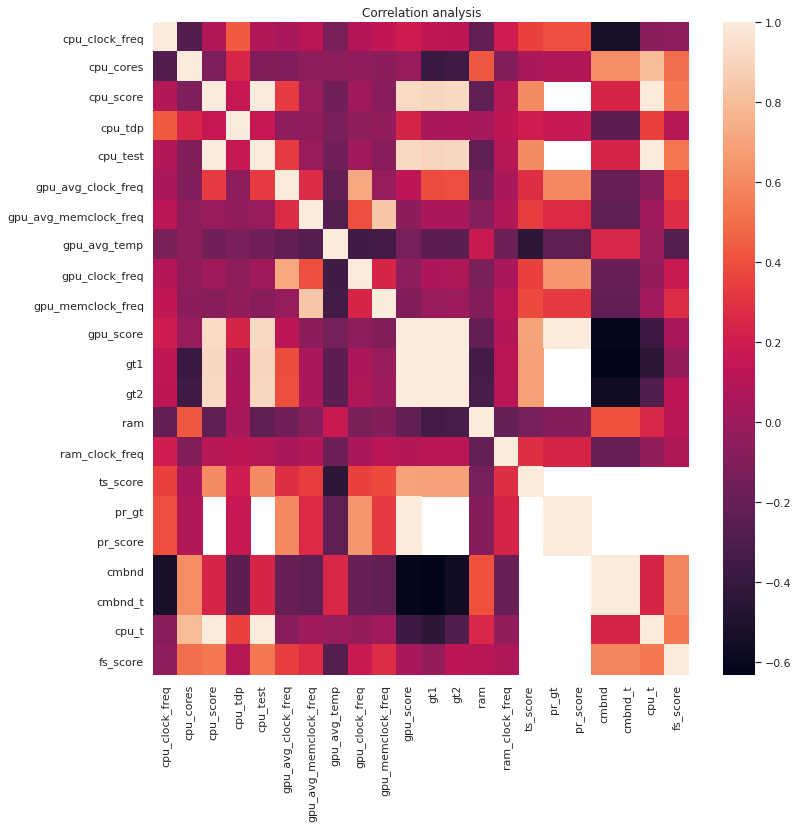

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
bx = sns.heatmap(df.drop(['gpu_count','gpu_vram','cpu_litho','benchmark_version'], axis=1).corr(), ax=ax)
bx.set_title('Correlation analysis')

>*As this heatmap shows, these are the most noteworthy positive correlations:*
* *gpu_clock_freq* and *pr_gt* (Port Royal's Graphics Test)
* *gpu_clock_freq* and *pr_score*
* *cpu_cores* and *cpu_t* (Fire Strike's CPU Test)

The positive correlations seen above make sense, considering that Port Royal is built around testing RTX GPUs to their limit and having faster clock speeds means having higher *pr_gt* scores. The same case cannot be said for Fire Strike's CPU Test - it only means that it benefits more by having more cores to distribute computing tasks to rather than clock speeds. 

In [9]:
pr_intel = pr[pr['cpu_make'] == 'Intel']
pr_amd = pr[pr['cpu_make'] == 'AMD']

fs_intel = fs[fs['cpu_make'] == 'Intel']
fs_amd = fs[fs['cpu_make'] == 'AMD']

ts_intel = ts[ts['cpu_make'] == 'Intel']
ts_amd = ts[ts['cpu_make'] == 'AMD']

intel = df[df['cpu_make'] == 'Intel']
amd = df[df['cpu_make'] == 'AMD']

intel_u = df_u[df_u['cpu_make'] == 'Intel']
amd_u = df_u[df_u['cpu_make'] == 'AMD']

>*Grouped and made separated DataFrames for Intel and AMD systems for later use.*

In [ ]:
print('AMD size: {}\nIntel size: {}'.format(amd.shape, intel.shape))

intel = intel.sample(761, replace=False)
df_u = pd.concat([intel, amd])

print('New Intel size: {}'.format(intel.shape))

AMD size: (761, 38)
Intel size: (2200, 38)
New Intel size: (761, 38)


>*Intel results outnumber AMD and this might be the effect of taking just the first page of results. Either way, randomly sampling without replacement from the Intel set will make further analysis meaningful. Making a new DataFrame out of the similar-sized samples*

### Boxplots

While boxplots may seem archaic, they're the most useful for presenting data between non-normal samples with outliers.

#### *Fire Strike scores*

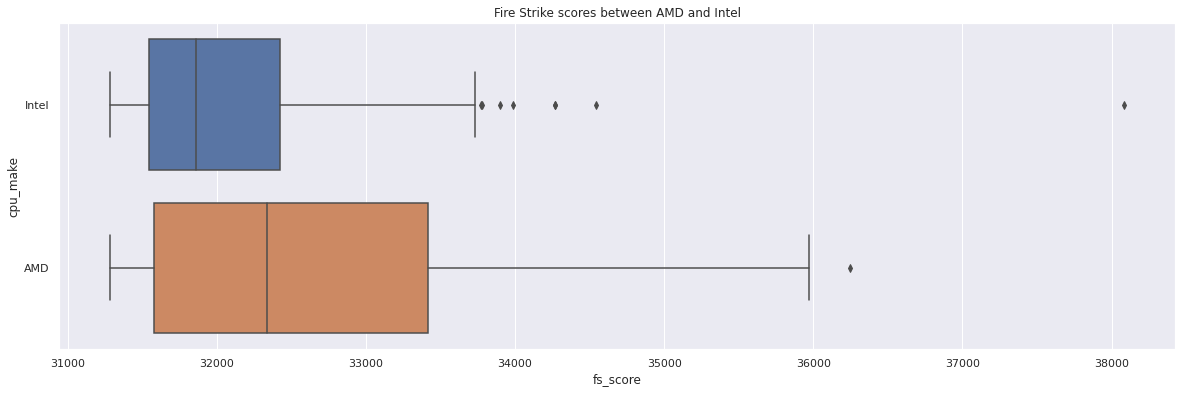

In [12]:
fs_med = sns.boxplot(data=df_u, x='fs_score', y='cpu_make', orient='h')
fs_med.set_title('Fire Strike scores between AMD and Intel')
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(20,6)})

>*For Fire Strike, AMD has greater variability than Intel and comes with outliers. Since they overlap, we cannot say even with 95% confidence that the true medians differ.*

#### *Time Spy scores*

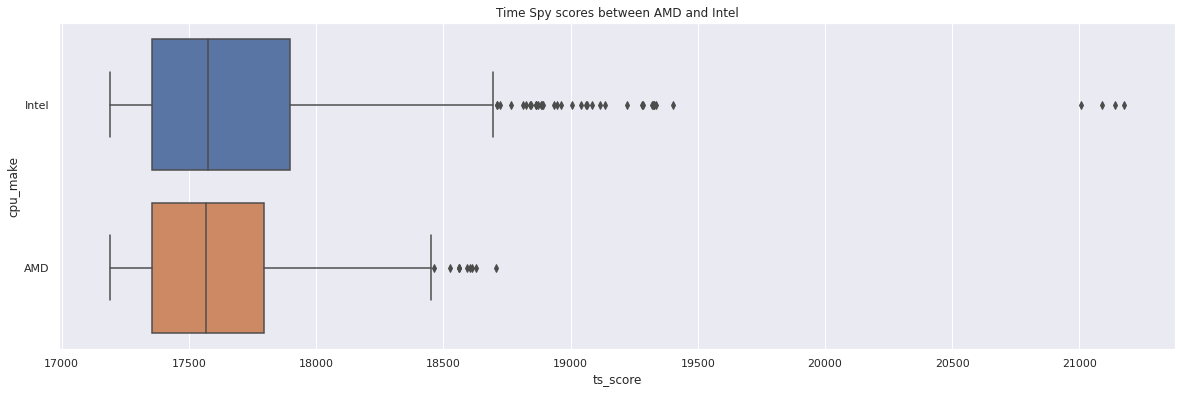

In [13]:
ts_med = sns.boxplot(data=df_u, x='ts_score', y='cpu_make', orient='h')
ts_med.set_title('Time Spy scores between AMD and Intel')
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(20,6)})

>*Time Spy scores show near-full overlap between Intel and AMD's IQR, potentially showing no difference when tested for significance. Considering that Intel has outliers, Mood's median test suffices.*

#### *Port Royal scores*

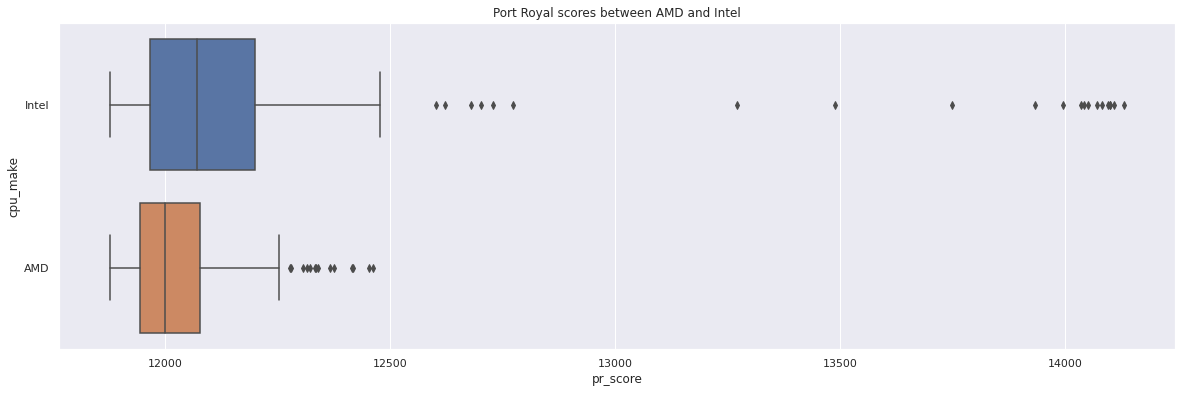

In [14]:
pr_med = sns.boxplot(data=df_u, x='pr_score', y='cpu_make', orient='h')
pr_med.set_title('Port Royal scores between AMD and Intel')
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(20,6)})

>*Even though Port Royal is GPU-bound since it tests an RTX card's ray-tracing capability, Intel varies more in median than AMD with an overlap. Again, outliers are very visible on Intel possibly due to higher clock speeds their CPUs can produce when cooled properly.*

Now that the boxplots are set, they all call for Mood's median test of significance. After that, it would be proper to include all three in a single test to have a 'larger picture'.

### Non-parametric Tests

Now, we are about to establish to get to a conclusion and whether or not the null hypothesis should be rejected or accepted.

To refresh-
>$Ho$ - *There is no difference in performance between AMD and Intel systems in 3DMark's benchmarking tools.*

>$Ha$ - *There is a difference in performance between AMD and Intel systems in 3DMark's benchmarking tools.*

#### Mood's Median Test



##### *Fire Strike scores*

>$Ho$ - There is no difference between Fire Strike scores between Intel and AMD

In [ ]:
print('AMD: ' + str(len(fs_amd)))
fs_intel = fs_intel.sample(158, replace=False)
print('Intel: ' + str(len(fs_intel)))

stat, p, med, tbl = stats.median_test(fs_intel.fs_score, fs_amd.fs_score)
print('p-value: {}\nmedian: {}'.format(p,med))

AMD: 158
Intel: 158
p-value: 0.055792946955537784
median: 31969.5


>*With 95% confidence, we accept the null hypothesis that there is no significant difference between Fire Strike scores of AMD and Intel systems with a grand median of 31969.5. Although, with the p-value teetering the edge of potential rejection, it is very possible that with a sample size larger than 158, we will be seeing a lower p-value.*

##### *Time Spy scores*

>$Ho$ - There is no difference between Time Spy scores between Intel and AMD

In [ ]:
print('AMD: ' + str(len(ts_amd)))
ts_intel = ts_intel.sample(333, replace=False)
print('Intel: ' + str(len(ts_intel)))

stat, p, med, tbl = stats.median_test(ts_intel.ts_score, ts_amd.ts_score)
print('p-value: {}\nmedian: {}'.format(p,med))

AMD: 333
Intel: 333
p-value: 0.5352660780387282
median: 17584.5


>*After sampling with 333 samples and getting a p-value of 0.5, the null hypothesis of having no difference between the Time Spy scores of Intel and AMD systems is accepted. This means that there is a ~53.52% probability of observing the same difference with random error.*

##### *Port Royal scores*

>$Ho$ - There is no difference between Port Royal scores between Intel and AMD

In [ ]:
print('AMD: ' + str(len(pr_amd)))
pr_intel = pr_intel.sample(len(pr_amd), replace=False)
print('Intel: ' + str(len(pr_intel)))

stat, p, med, tbl = stats.median_test(pr_intel.pr_score, pr_amd.pr_score)
print('p-value: {}\nmedian: {}'.format(p,med))

AMD: 270
Intel: 270
p-value: 9.494244594195838e-08
median: 12028.0


>*For Port Royal, being initially thought of being GPU-bound rather than CPU-bound, actually benefits from Intel's instructions per core and higher core clocks. This is proven with a p-value of ~0.000000095, making the difference statistically significant therefore we reject the null hypothesis of not having a difference in Port Royal scores between AMD and Intel systems.*

##### *Final Median Test (Entire Data Set)*

For the final test, I will still be using Median's Mood test over the entire data set again, due to somewhat-extreme outliers being present in the visualizations.

In [ ]:
print('AMD: ' + str(len(amd_u)))
intel_u = intel_u.sample(len(amd_u), replace=False)
print('Intel: ' + str(len(intel_u)))

stat, p, med, tbl = stats.median_test(intel_u.score, amd_u.score)
print('p-value: {}\nmedian: {}'.format(p,med))

AMD: 761
Intel: 761
p-value: 0.0014806858460356164
median: 17498.5


>*The p-value being lower than 0.05 for the entirety of the data set means that we are rejecting the null hypothesis, signifying the difference between the observed difference between the 3DMark scores of Intel and AMD systems.*

## **Summary**

Individually, on Fire Strike and Time Spy, the null hypotheses of having a significant difference between Intel and AMD systems on those benchmarks were accepted and quite unexpectedly, the aggregation of the different data sets allowed the p-value to have enough value to reject the null hypothesis of this research at a 95% confidence.

This outcome pointing towards Simpson's paradox, at least for me, means two things -
1. Not analyzing the differences of every component in the data set;
2. Not having enough sample size;

Admittedly, I did not expect the sample size to shrink so much because of fewer AMD results on the first page of every benchmark summary. It may or may not have affected the skewness of the boxplots from the very beginning.

With all the data that was processed and analyzed, I therefore say that this research is inconclusive.

### *P.S.*

This is not the end of this research - I will be making my scraper faster and better at automatically going through the results by itself. I will be redoing this pretty soon with a much larger data set and more detailed significance tests.